In [1]:
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import helper


/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:163: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:184: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [46]:
#root="results_testing_saving/"
root="~/scratch/detailed_save/"
seed_ints = ["69904-149796","69904","149796"]
folders=["variable","static","static"]
season_lens=[300,100_000,100_000]
rule = 30
rules = [f"{rule}-{rule}", rule, rule]
num_repeats = 5
pop_size = 1000


all_edges = []
for g in range(3):
    edges=[np.loadtxt(os.path.expanduser(root+f"{folders[g]}/stats_{season_lens[g]}_{rules[g]}_{seed_ints[g]}_{i+1}_edges.txt")) for i in range(num_repeats)]
    edges = np.array(edges).astype(int) 
    num_generations=int(edges.shape[1]/4/pop_size)
    print(edges.shape, num_generations)
    edges = edges.reshape(num_repeats, num_generations*pop_size, 2, 2)
    all_edges.append(edges)
all_edges=np.vstack(all_edges)
all_edges=np.reshape(all_edges, (3, num_repeats, num_generations*pop_size, 2, 2 ))
all_edges.shape

(5, 39596000) 9899
(5, 39596000) 9899
(5, 39596000) 9899


(3, 5, 9899000, 2, 2)

In [47]:
experiment_of_interest = 0
rep_of_interest = 1

start_stop_pair = [[37,43],[297,303]] #[[20,40],[290,310]]

final_counts=[]

for i in start_stop_pair:
    selected_edges = all_edges[experiment_of_interest, rep_of_interest, :, :, :]
    # Parameters
    num_gen_start = i[0]
    num_gen_stop = i[1] #args.num_generations
    num_gens_show = num_gen_stop - num_gen_start
    new_edges = []
    for e in selected_edges:
        if (e[0][0] >= num_gen_start) & (e[0][0] < num_gen_stop):
            #e[0][0] = e[0][0] - num_gen_start
            #e[1][0] = e[1][0] - num_gen_start
            new_edges.append([(e[0][0]- num_gen_start, e[0][1]),(e[1][0]- num_gen_start, e[1][1])])
    edges = new_edges.copy()

    G, pos, node_colors = helper.make_network(num_gens_show, pop_size, edges)

    #Draw trend, num lineages
    pcs = np.reshape(np.array(node_colors),(num_gens_show+1,pop_size))
    unique_counts = []
    for subarray in pcs:
        unique_subarrays = np.unique(subarray, axis=0)
        unique_counts.append(len(unique_subarrays))
    final_counts.append(unique_counts)


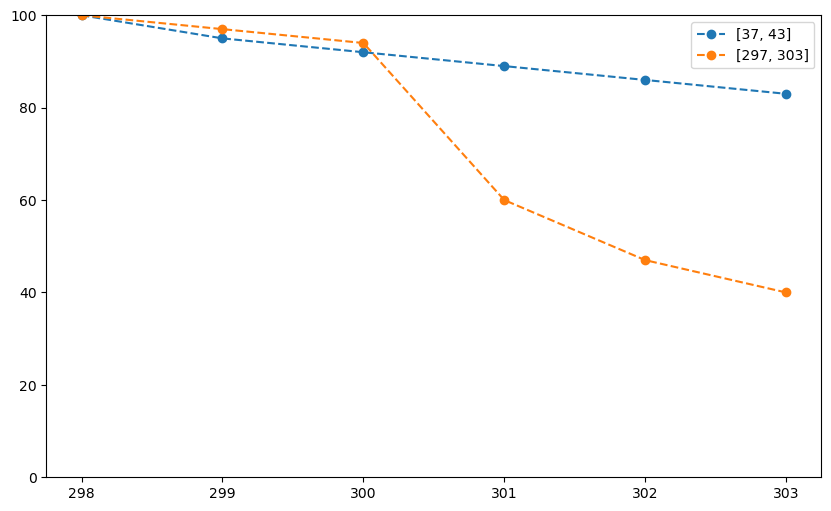

In [48]:
plt.figure(figsize=(10, 6))
for i,p in enumerate(start_stop_pair):
    plt.plot(final_counts[i][1:],marker='o', linestyle='--',label=str(p)) 
    #[1:] because first is always 1000 followed by 100 due to 0.1 selection size.
    #only interesting from that point on

x_tick_labels = np.arange(num_gen_start+1,num_gen_stop+1,1)
x_ticks = list(range(len(unique_counts[1:])))
plt.xticks(x_ticks, x_tick_labels)
plt.ylim(0,100)
plt.legend()
plt.show()

In [18]:
'''
#Draw network
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=20, linewidths=0.0)
nx.draw_networkx_edges(G, pos, node_size=20, alpha=0.1)
plt.title("Lineages")
plt.show()
'''

'\n#Draw network\nplt.figure(figsize=(12, 8))\nnx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=20, linewidths=0.0)\nnx.draw_networkx_edges(G, pos, node_size=20, alpha=0.1)\nplt.title("Lineages")\nplt.show()\n'

In [9]:
#Draw matrix
i=0
num_rows = num_gens_show+1
num_columns = pop_size
color_matrix = np.zeros((num_rows, num_columns))
for r in range(num_rows):
    for c in range(num_columns):
        color_matrix[r, c] = node_colors[i]
        i+=1

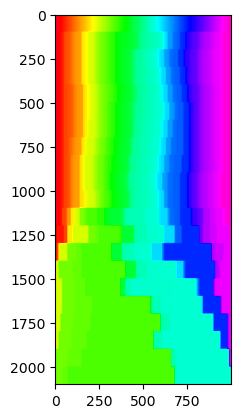

In [15]:
plt.imshow(np.sort(np.repeat(color_matrix, 100, axis=0)),cmap="gist_rainbow")

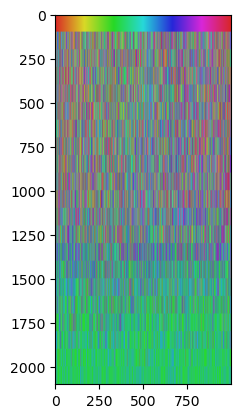

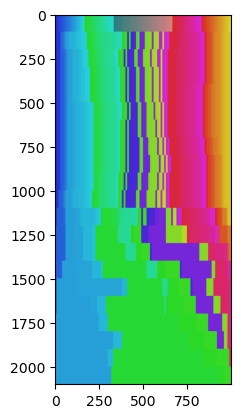

In [6]:


color_matrix2 = np.repeat(color_matrix, 100, axis=0)
plt.imshow(color_matrix2)
plt.show()

color_matrix_sorted=np.array([sorted(subarray, key=lambda x: tuple(x)) for subarray in color_matrix2])
plt.imshow(color_matrix_sorted)
plt.show()

In [8]:
node_colors

[(0.85, 0.15000000000000002, 0.15000000000000002),
 (0.85, 0.15420000000000003, 0.15000000000000002),
 (0.85, 0.1584, 0.15000000000000002),
 (0.85, 0.16260000000000002, 0.15000000000000002),
 (0.85, 0.16680000000000003, 0.15000000000000002),
 (0.85, 0.171, 0.15000000000000002),
 (0.85, 0.17520000000000002, 0.15000000000000002),
 (0.85, 0.17940000000000003, 0.15000000000000002),
 (0.85, 0.1836, 0.15000000000000002),
 (0.85, 0.18780000000000002, 0.15000000000000002),
 (0.85, 0.192, 0.15000000000000002),
 (0.85, 0.1962, 0.15000000000000002),
 (0.85, 0.20040000000000002, 0.15000000000000002),
 (0.85, 0.2046, 0.15000000000000002),
 (0.85, 0.2088, 0.15000000000000002),
 (0.85, 0.21300000000000002, 0.15000000000000002),
 (0.85, 0.2172, 0.15000000000000002),
 (0.85, 0.22140000000000004, 0.15000000000000002),
 (0.85, 0.22560000000000002, 0.15000000000000002),
 (0.85, 0.2298, 0.15000000000000002),
 (0.85, 0.234, 0.15000000000000002),
 (0.85, 0.23820000000000002, 0.15000000000000002),
 (0.85, 0.2